In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

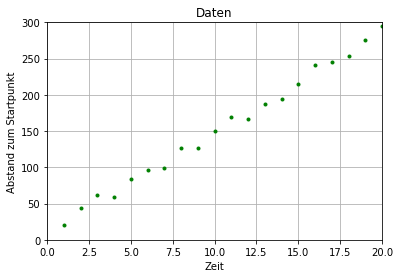

In [2]:
#Messzeitpunkt in Sekunden
t = range(1,21)

#Abstandsmesswerte in Metern
s = [20.21, 44.31, 61.54, 59.5, 84.18, 95.83, 98.65, 126.82, 127.07, 149.65, 169.91, 166.8, 187.15, 194.81, 214.78, 241.59, 245.7, 253.74, 275.61, 295.41];


ausg = np.array(t[0:20:2])
ausg = ausg.reshape(-1, 1)
ziel = s[0:20:2]
plt.figure()
plt.title('Daten')
plt.xlabel('Zeit')
plt.ylabel('Abstand zum Startpunkt')
plt.plot(t, s, 'g.')
plt.axis([0, 20, 0, 300])
plt.grid(True)
plt.savefig('training.jpg')
#plt.show()


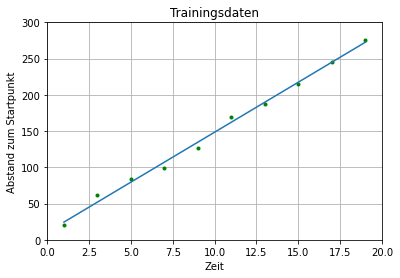

In [3]:
model = LinearRegression()
model.fit(ausg, ziel)
plt.figure()
plt.title('Trainingsdaten')
plt.xlabel('Zeit')
plt.ylabel('Abstand zum Startpunkt')
plt.plot(ausg, ziel, 'g.')
plt.plot(ausg, model.predict(ausg))
plt.axis([0, 20, 0, 300])
plt.grid(True)
plt.savefig('linear.jpg')
#plt.show()

In [4]:
#polynomial regression
x_t, x_test, y_train, y_test = train_test_split(t, s, shuffle=False)
x_train = np.asarray(x_t)
x_train = x_train.reshape(-1, 1)
#print(x_train)
x_test = np.asarray(x_test)
x_test = x_test.reshape(-1,1)


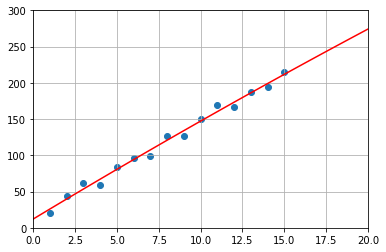

r_squared l 0.6950620446485392
r-squared qu 0.4997105187730606


In [5]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
xx = np.linspace(0, 20, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
#plt.plot(xx, yy)

quadratic_f = PolynomialFeatures(degree=2)
x_train_qu = quadratic_f.fit_transform(x_train)
x_test_qu = quadratic_f.transform(x_test)

regressor_qu = LinearRegression()
regressor_qu.fit(x_train_qu, y_train)
xx_qu = quadratic_f.transform(xx.reshape(xx.shape[0], 1))

plt.plot(xx, regressor_qu.predict(xx_qu), c='r')
plt.axis([0, 20, 0, 300])
plt.grid(True)
plt.scatter(x_train, y_train)
plt.show()
print('r_squared l', regressor.score(x_test, y_test))
print('r-squared qu', regressor_qu.score(x_test_qu, y_test))



